## 5.2 Random Forest

In this chapter, we delve into the Random Forest algorithm - an ensemble learning method built on decision trees. While retaining much of the interpretability of decision trees, Random Forests offer improved robustness and prediction accuracy by building multiple trees and aggregating their predictions. We'll train a Random Forest model on our kidney disease dataset, assess its performance, visualize learning curves, and evaluate feature importance. We will also investigate how diabetes, a potential confounding variable, might influence the model's performance.

## 5.2.1: Model Training and Evaluation

Here we train our Random Forest Classifier on the kidney disease dataset. Using different imputation techniques to deal with missing data, we'll assess its performance with key metrics including accuracy, precision, recall, and F1-score.

In [8]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

In [9]:
from util.functions import impute_and_train

df_numeric = pd.read_csv('processed/df_numeric.csv')

df_num = pd.read_csv('processed/df_numeric.csv')

results = impute_and_train(df_num, model)

    

learning with mean imputed data
Cross-validation iteration 1/5
Cross-validation iteration 2/5
Cross-validation iteration 3/5
Cross-validation iteration 4/5
Cross-validation iteration 5/5
learning with median imputed data
Cross-validation iteration 1/5
Cross-validation iteration 2/5
Cross-validation iteration 3/5
Cross-validation iteration 4/5
Cross-validation iteration 5/5
learning with mode imputed data
Cross-validation iteration 1/5
Cross-validation iteration 2/5
Cross-validation iteration 3/5
Cross-validation iteration 4/5
Cross-validation iteration 5/5
learning with KNN imputed data
Cross-validation iteration 1/5
Cross-validation iteration 2/5
Cross-validation iteration 3/5
Cross-validation iteration 4/5
Cross-validation iteration 5/5
learning with MICE imputed data
Cross-validation iteration 1/5
Cross-validation iteration 2/5
Cross-validation iteration 3/5
Cross-validation iteration 4/5
Cross-validation iteration 5/5
learning with iterative imputed data
Cross-validation iteration 

### 5.2.2 Model Performance Visualization

To better understand the model's predictive capability and identify areas for improvement, we visualize the performance metrics and confusion matrices resulting from the various model iterations in this section.

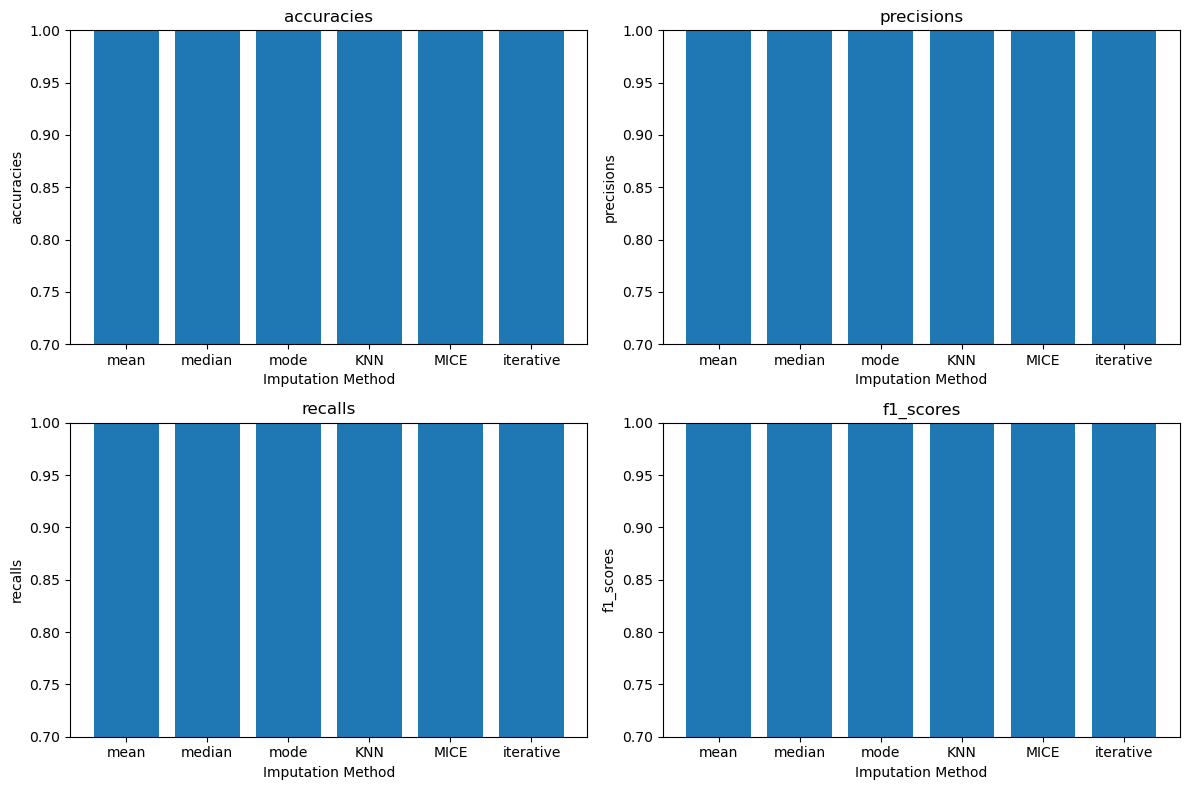

In [10]:
from util.functions import plot_metrics
plot_metrics(results['metrics'])
    

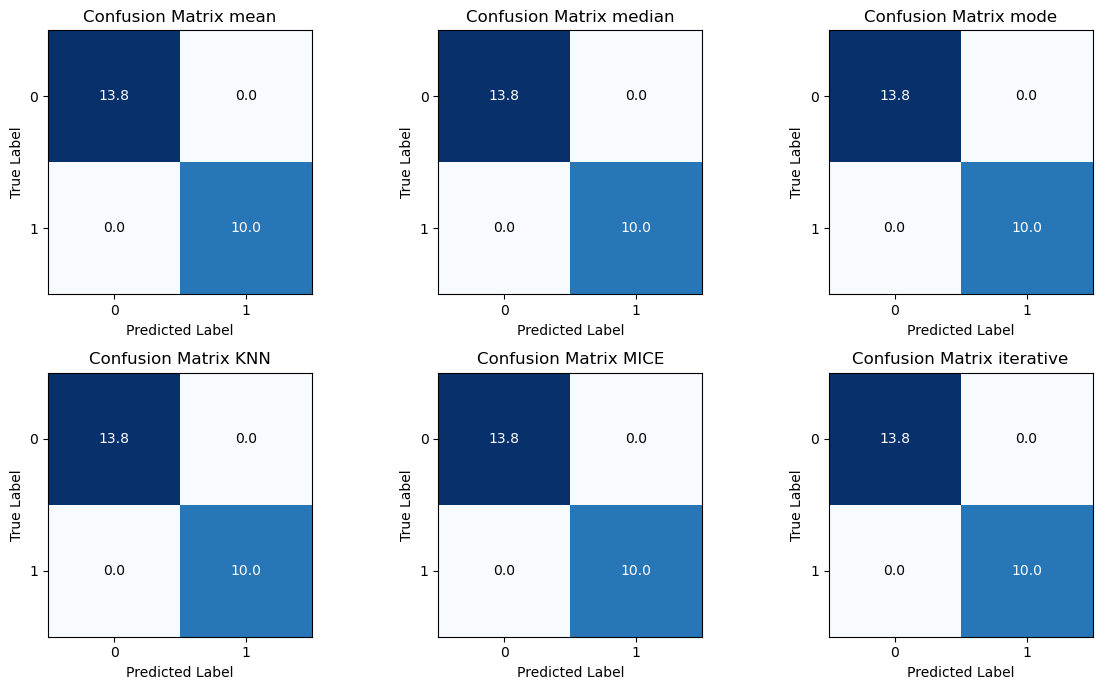

In [11]:
from util.functions import plot_mean_confusion_matrices
plot_mean_confusion_matrices(results['confusion_matrices'])

### 5.2.3 Learning Curves Analysis

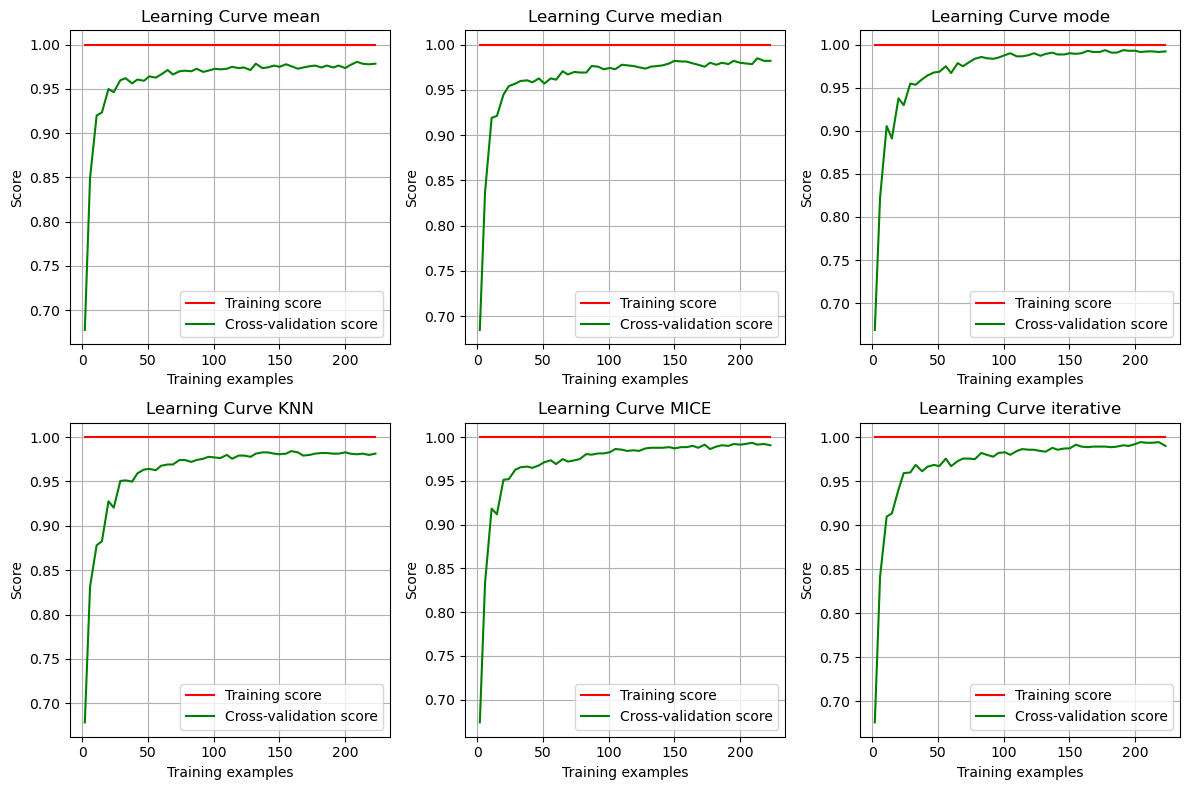

In [12]:
from util.functions import plot_learning_curves
plot_learning_curves(results['learning_curves'])

### 5.2.4 Feature Importance Evaluation

feature importances for iteration 0


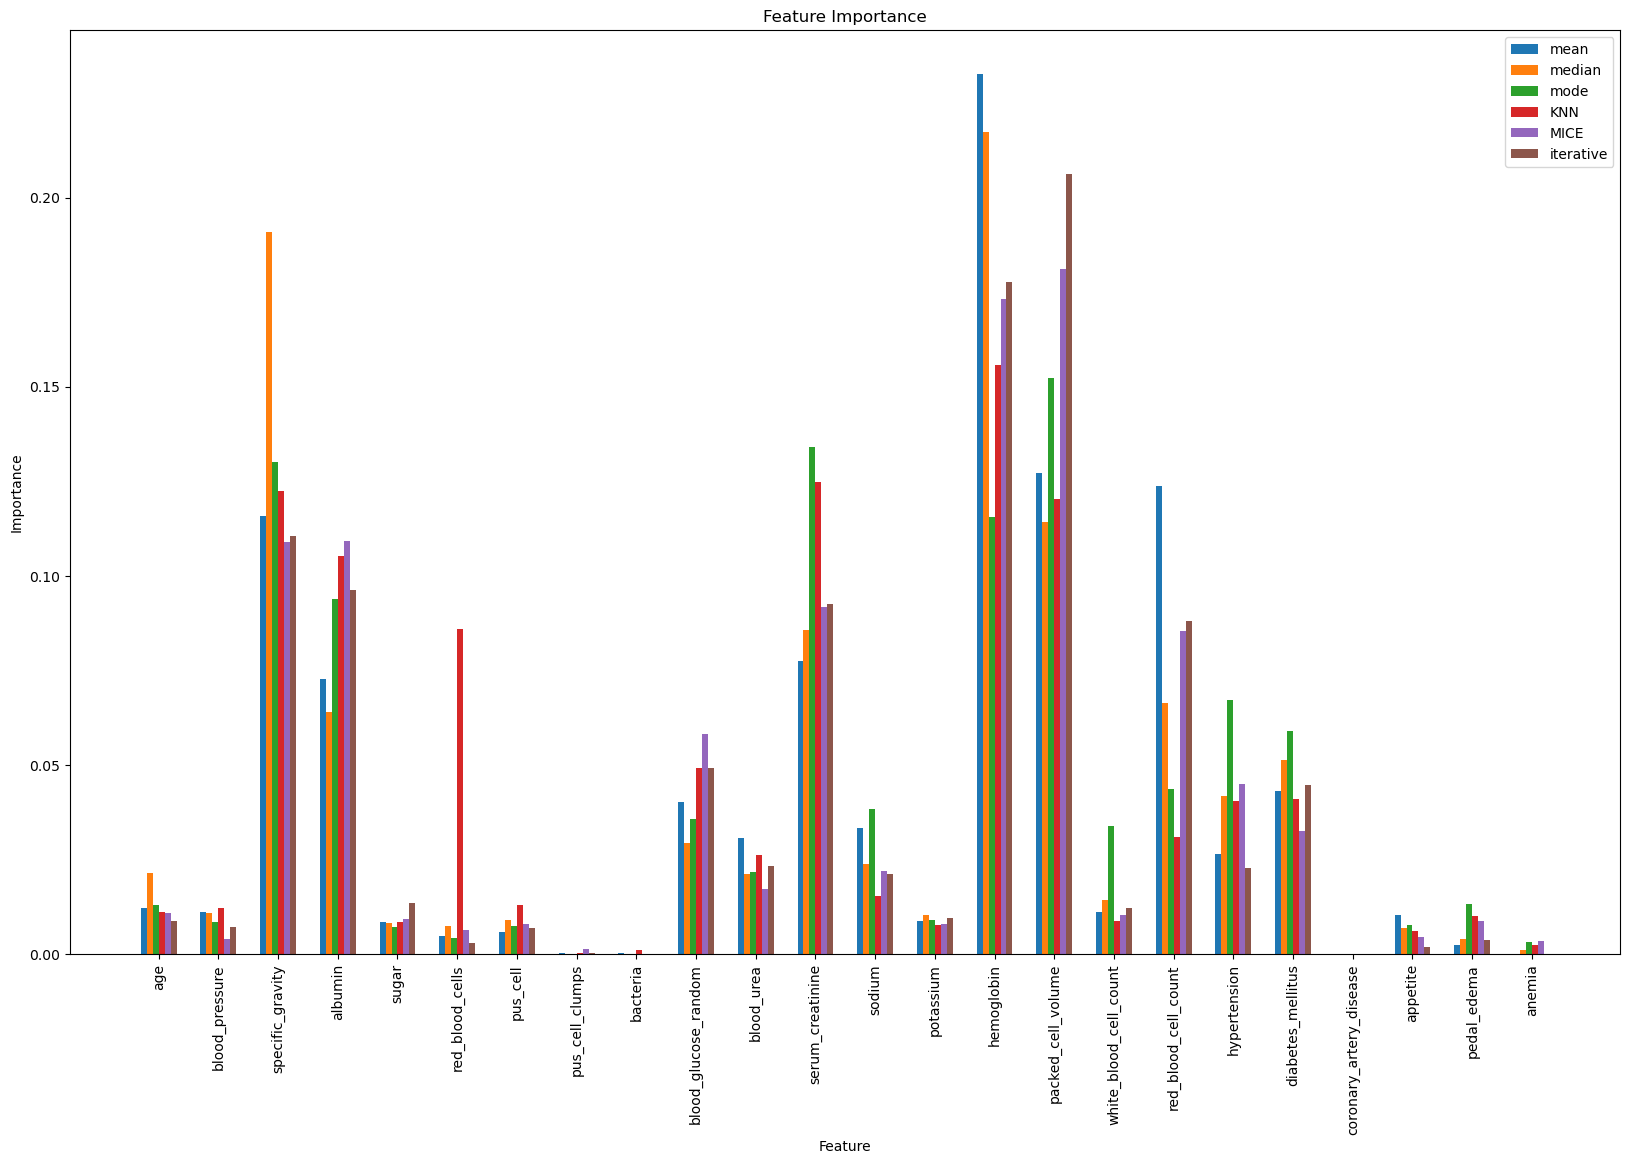

feature importances for iteration 1


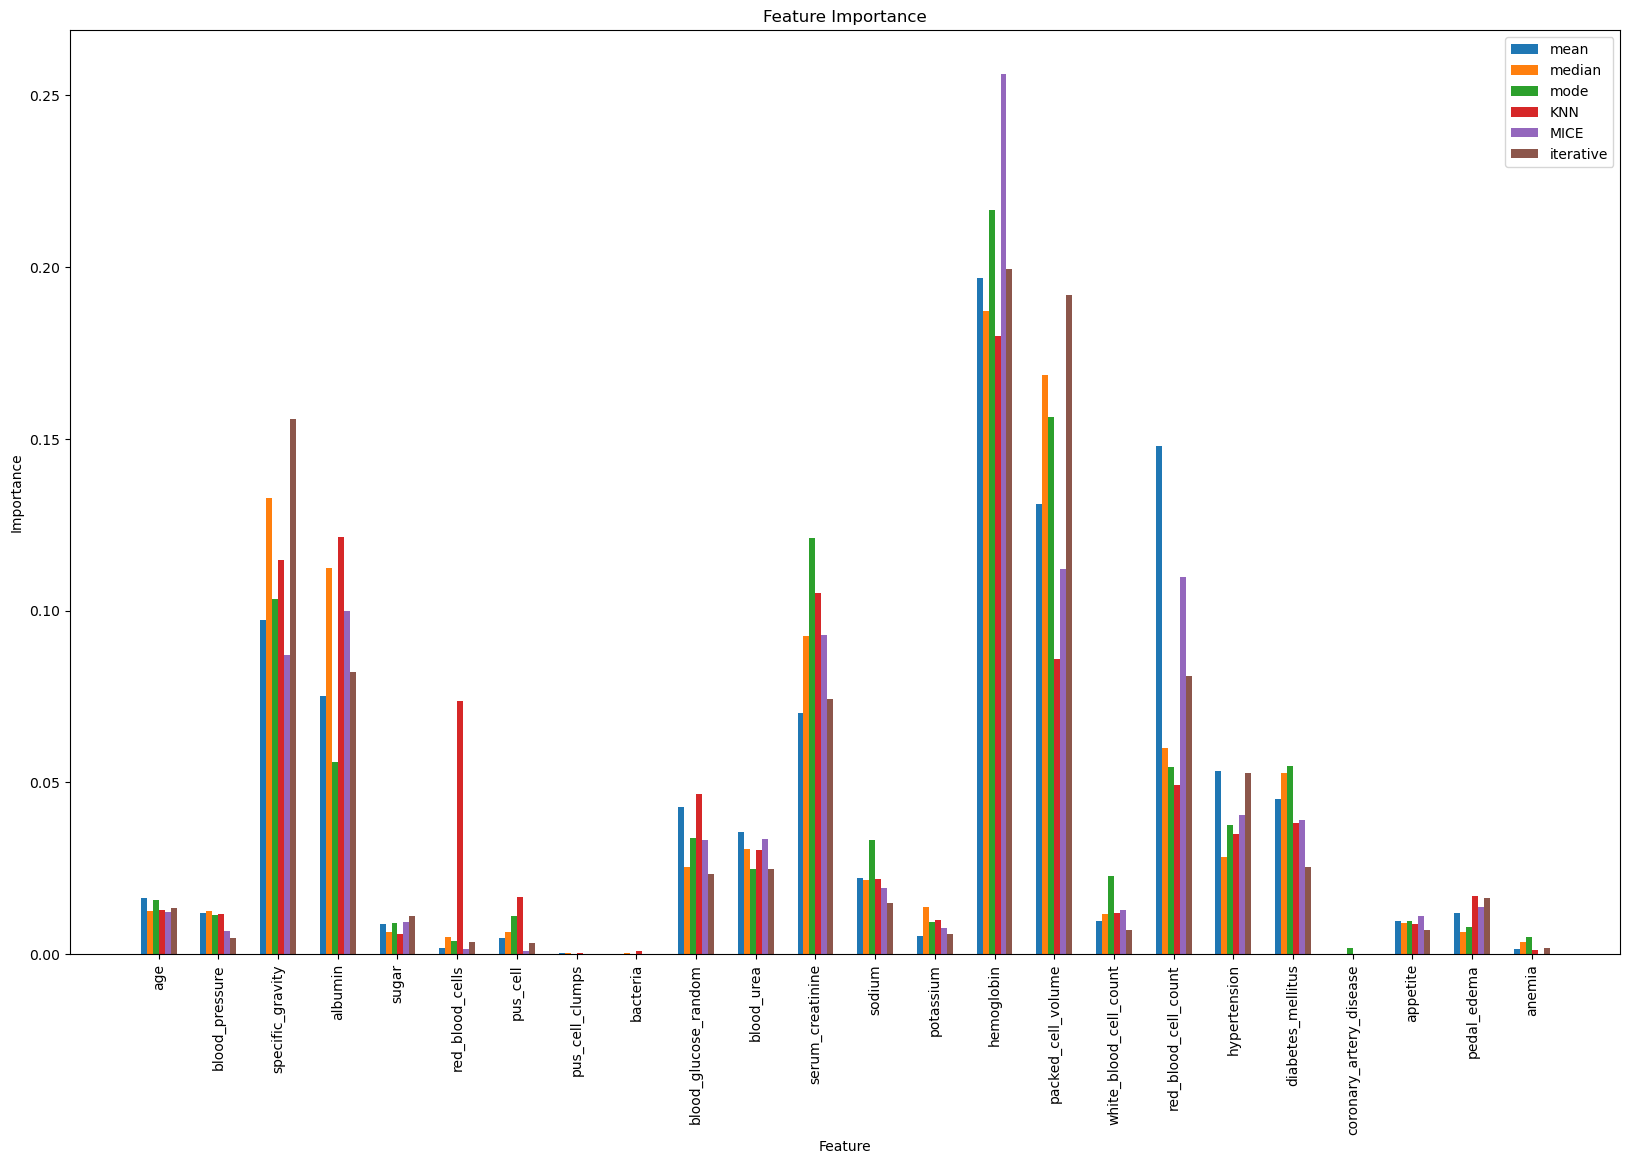

feature importances for iteration 2


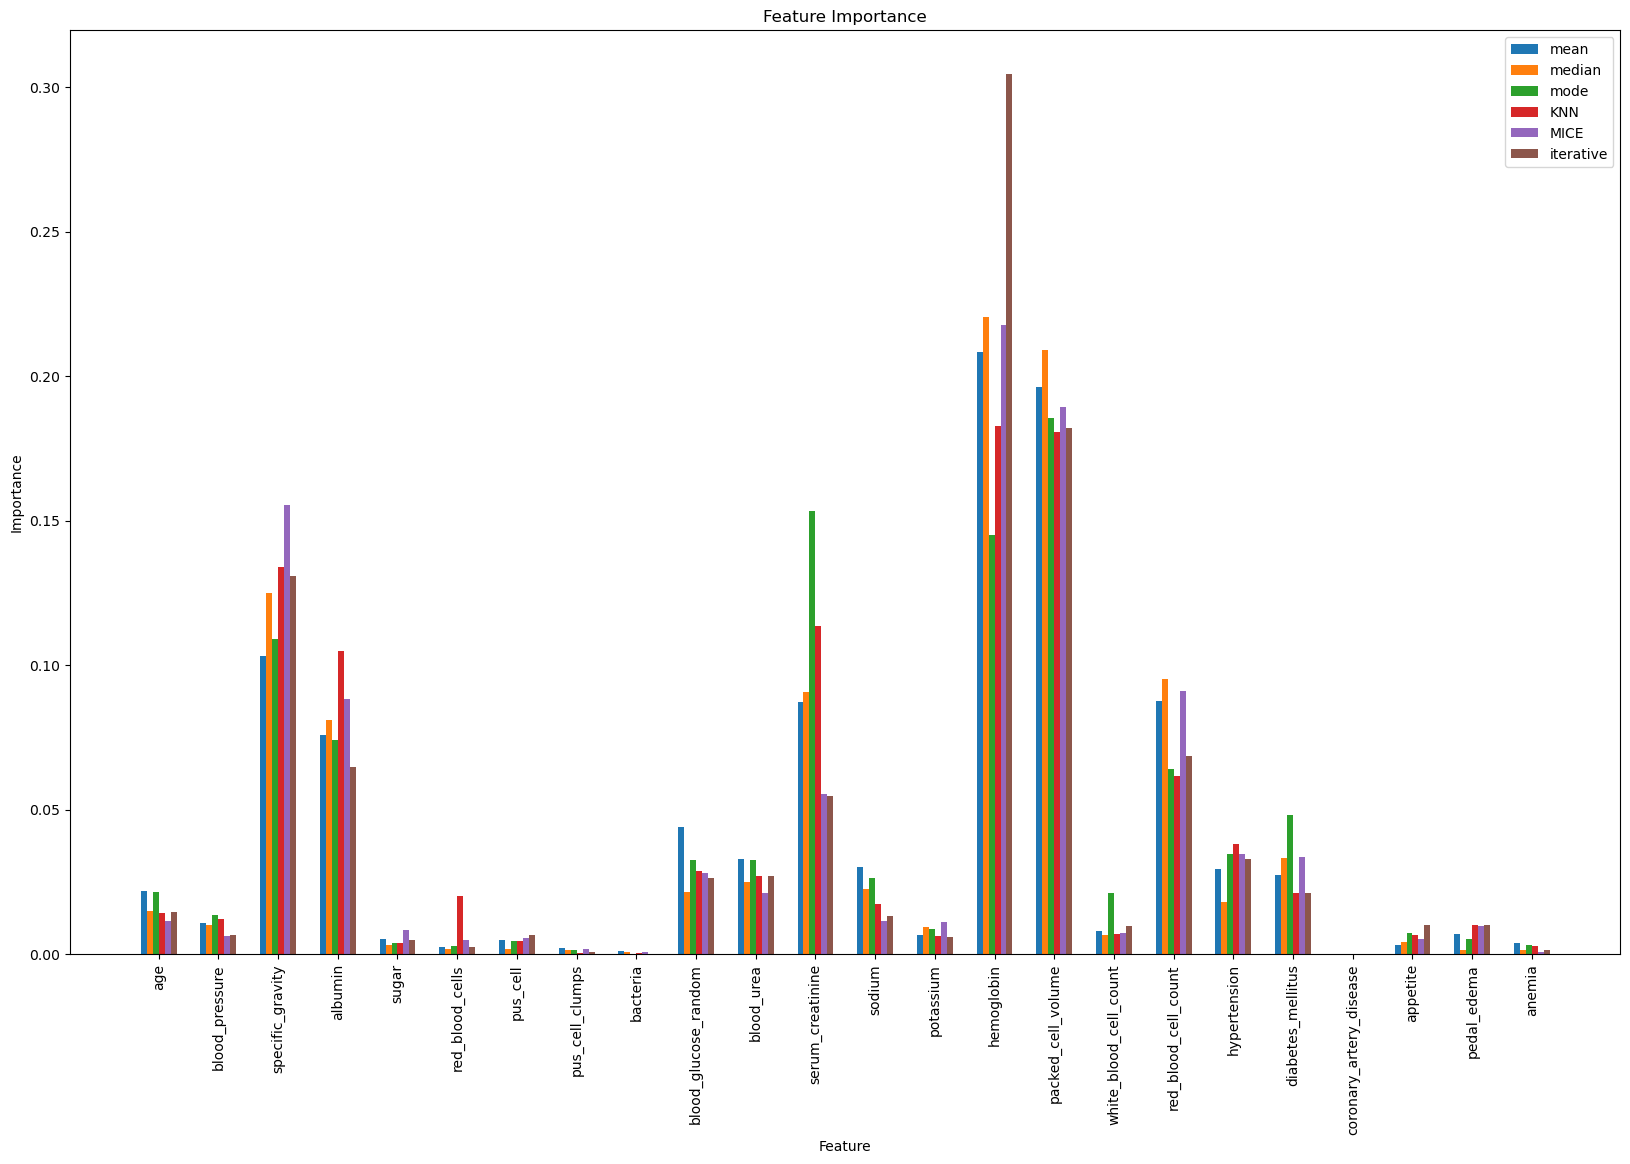

feature importances for iteration 3


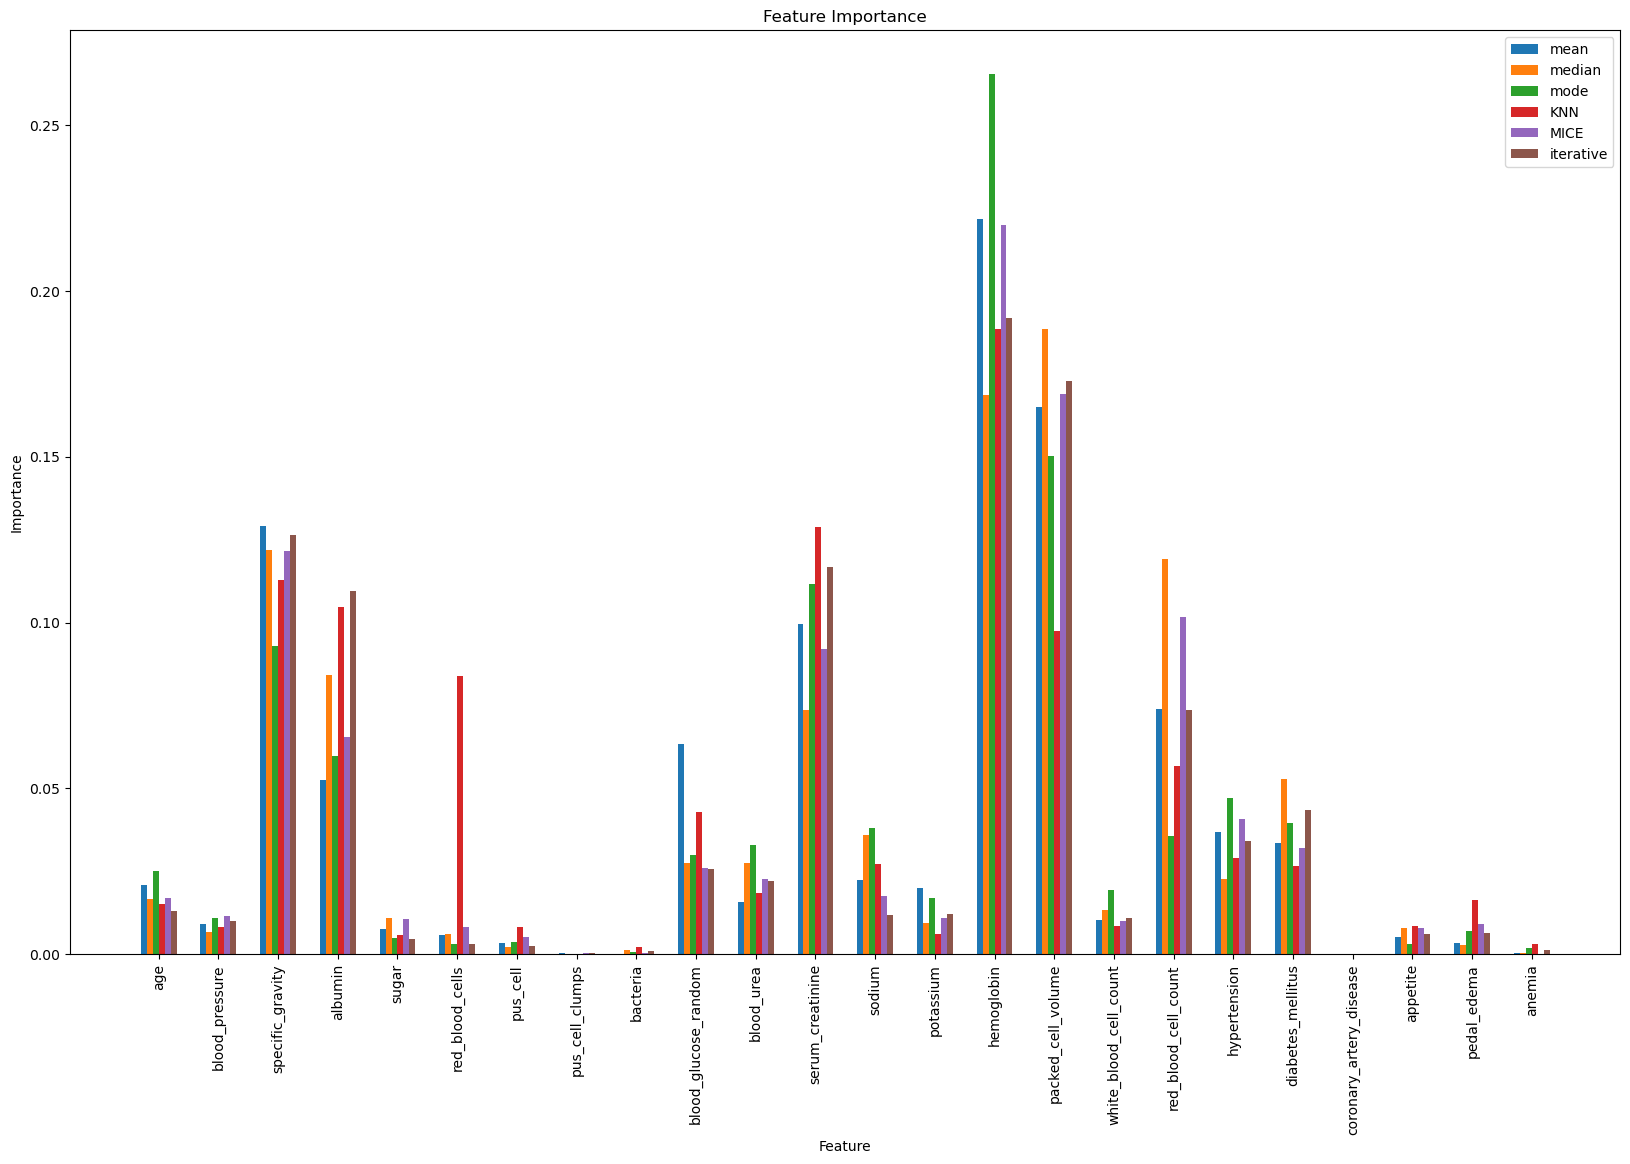

feature importances for iteration 4


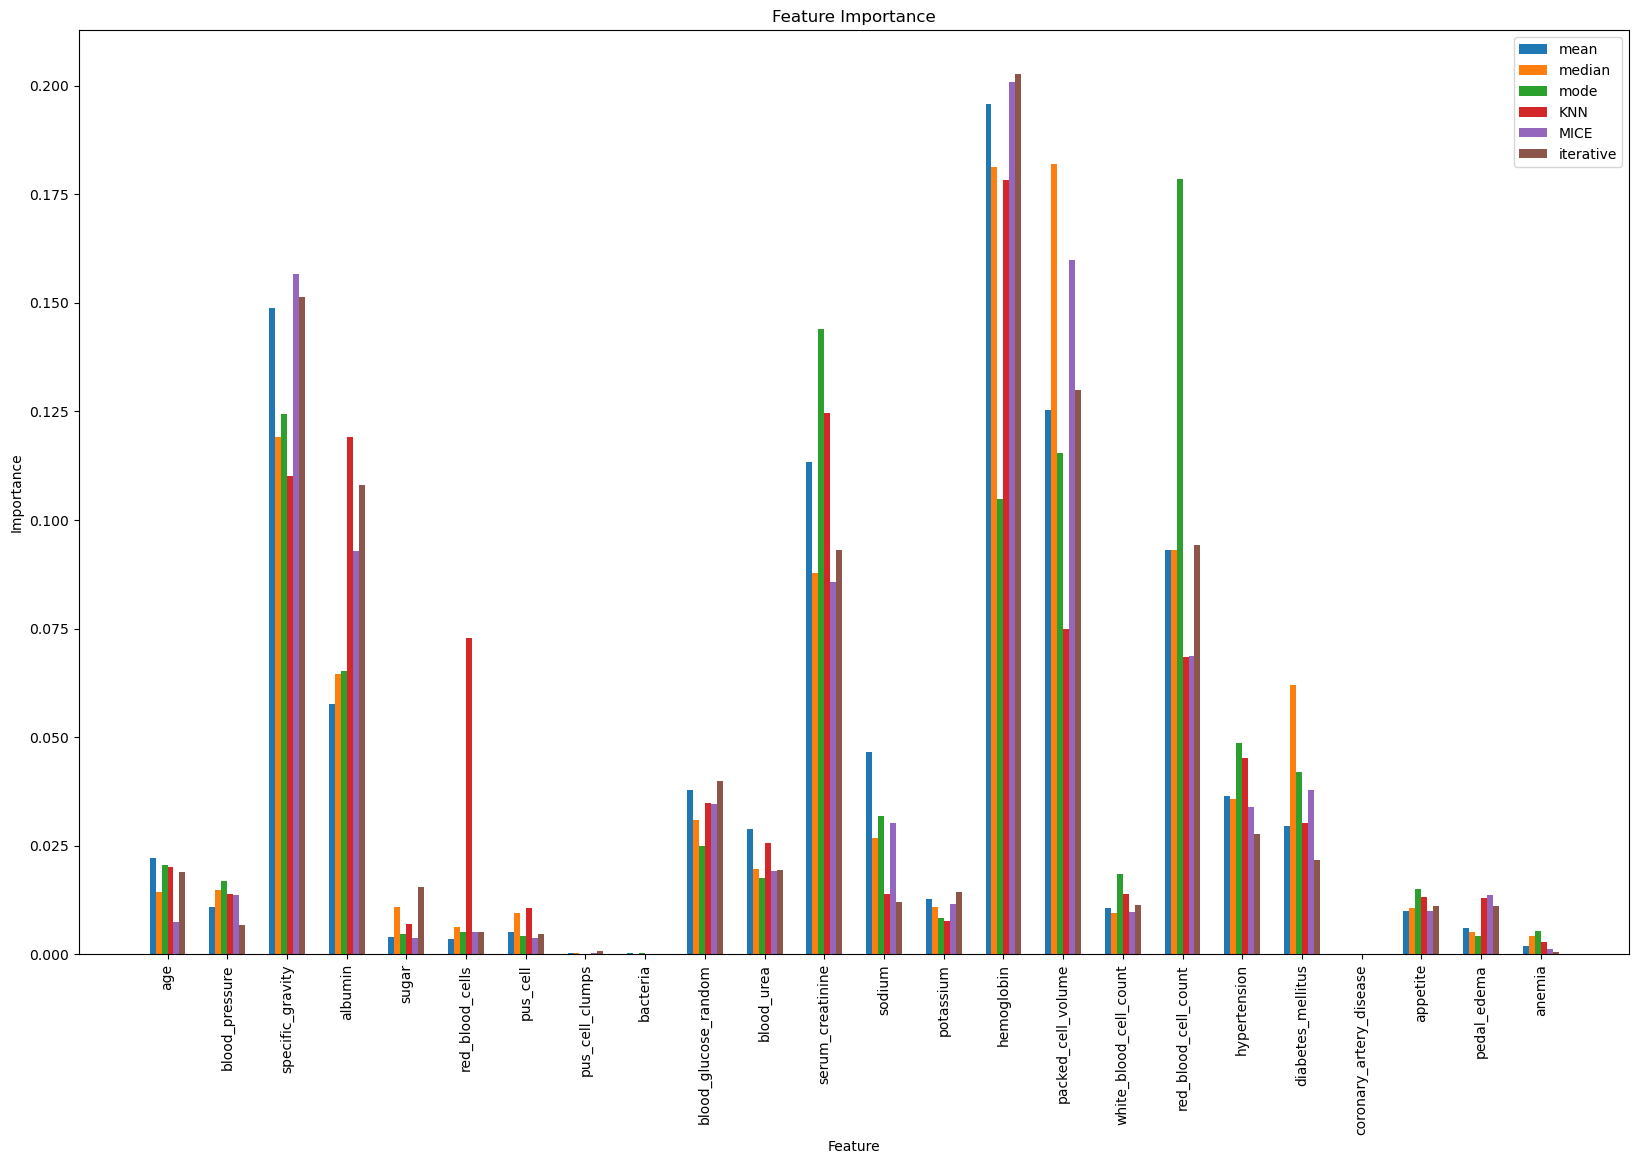

In [13]:
from util.functions import plot_feature_importances
# plot all feature importances as subplots
import pandas as pd
import numpy as np
df_numeric = pd.read_csv('processed/df_numeric.csv')
feature_importances = {}
all_feature_importances = {}
for i in range(5):
    for (name, models) in results['models'].items():
        feature_importances[name] = pd.DataFrame(models[i].feature_importances_, index=df_numeric.drop(columns=['class']).columns, columns=['Importance'])

    print('feature importances for iteration', i)
    plot_feature_importances(feature_importances)


#### Mean feature importances across all folds

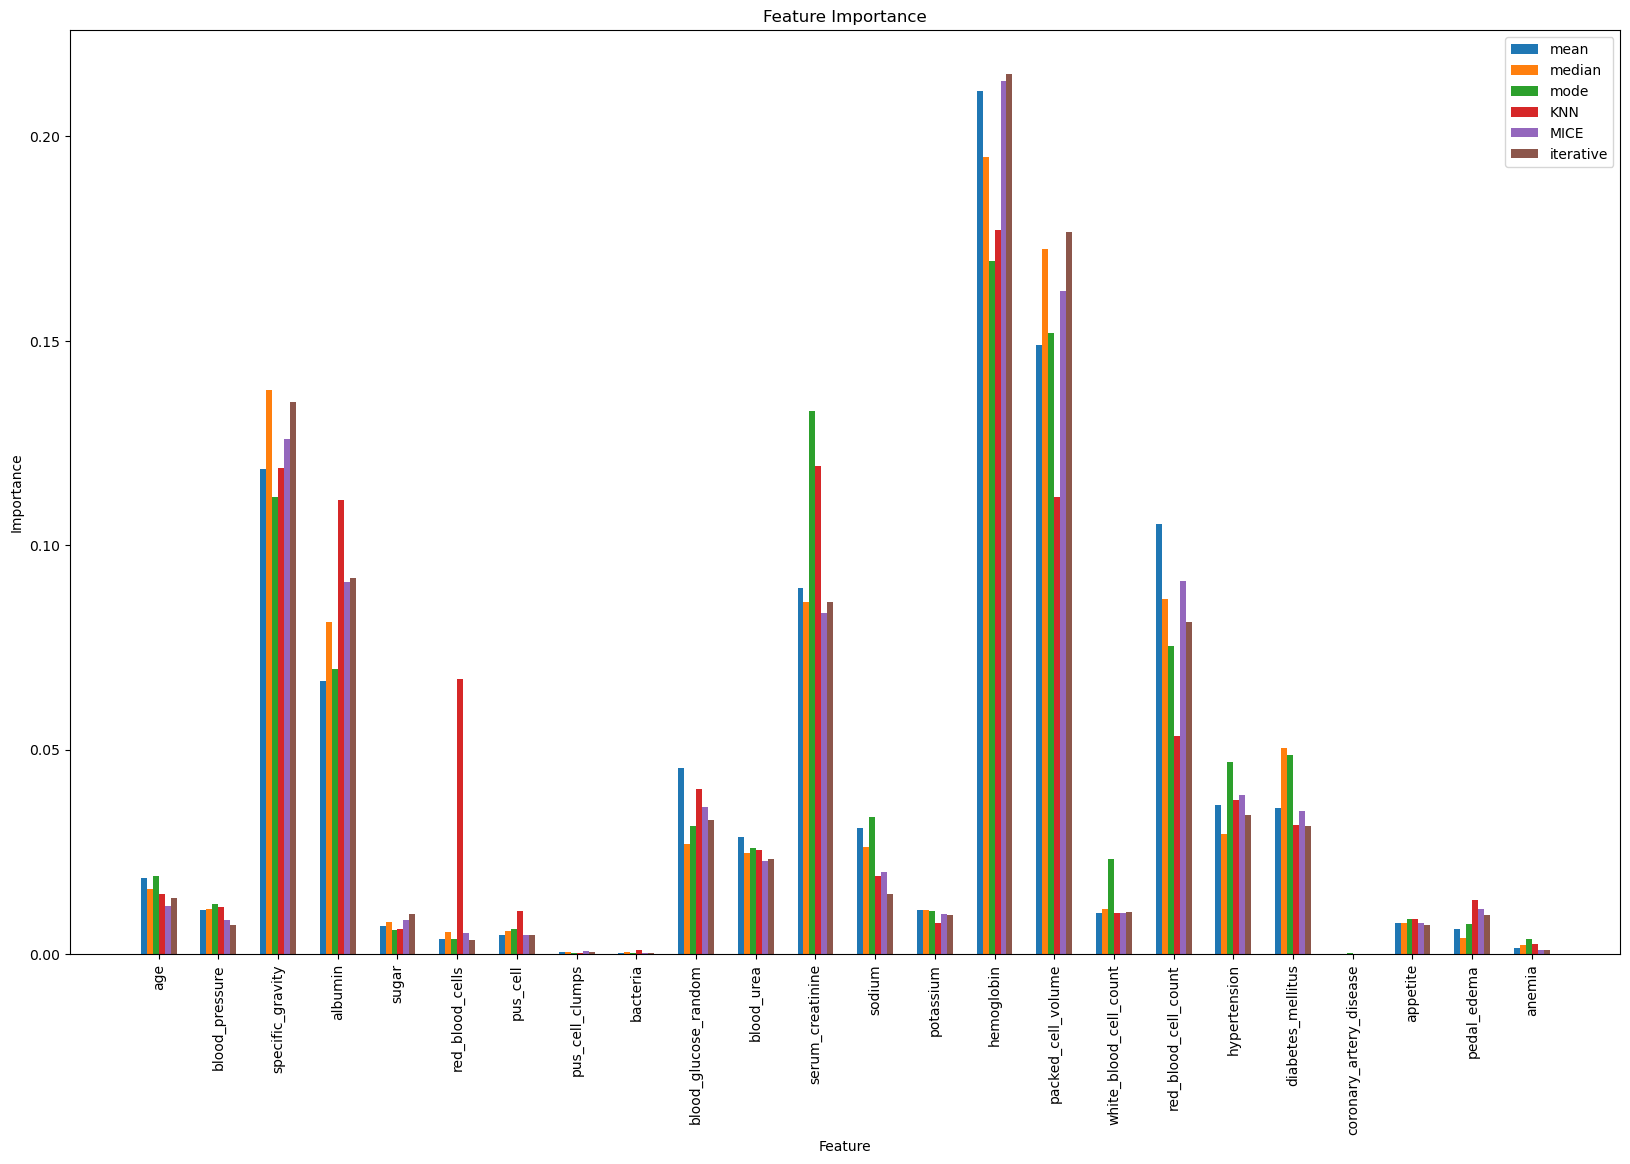

In [14]:
# plot all feature importances as subplots
import pandas as pd
import numpy as np
df_numeric = pd.read_csv('processed/df_numeric.csv')
feature_importances = {}
feature_importances_df = pd.DataFrame(columns=df_numeric.drop(columns=['class']).columns, index=pd.MultiIndex.from_product([results['models'].keys(), range(5)], names=['imputation', 'iteration']))

for (name, models) in results['models'].items():
    fi = []
    for i, model in enumerate(models):
        normalized = model.feature_importances_ / np.sum(model.feature_importances_)
        fi.append(normalized)
        feature_importances_df.loc[(name, i)] = normalized
    
    feature_importances[name] = pd.DataFrame(np.mean(fi, axis=0), index=df_numeric.drop(columns=['class']).columns, columns=['Importance'])

feature_importances_df.to_csv('results/feature_importances_random_forests.csv', index=True)
plot_feature_importances(feature_importances)

### 5.2.5 Aggregated Performance Metrics

In [11]:
metrics_rf = results['metrics']

metrics_rf = pd.DataFrame(metrics_rf)


for col in metrics_rf.columns:
    print(col)

m = []
for col in metrics_rf.columns:
    m.append(metrics_rf[col])


l = []


for i in range(4):
    for j in m[i]:
        l.append(j)

mean = []

for i in l:
    mean.append(np.mean(i))

print(mean)

print(mean[6:12])

mean_dict = {
    'accuracies': mean[0:6],
    'precisions': mean[6:12],
    'recalls': mean[12:18],
    'f1_scores': mean[18:24]
}

mean_df = pd.DataFrame(mean_dict)


mean_df.to_csv('metrics_rf.csv', index = False)

accuracies
precisions
recalls
f1_scores
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
